In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Bhabesh Boro\Desktop\AI mafia\Linear Regression\Train.csv")
x1=df['feature_1'].values
x2=df['feature_2'].values
x3=df['feature_3'].values
x4=df['feature_4'].values
x5=df['feature_5'].values
y=df['target'].values

x1 = x1.reshape((-1,))
x2 = x2.reshape((-1,))
x3 = x3.reshape((-1,))
x4 = x4.reshape((-1,))
x5 = x5.reshape((-1,))
y = y.reshape((-1,))
print(x1.shape,x2.shape,x3.shape,x4.shape,x5.shape,y.shape)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(y)

(1600,) (1600,) (1600,) (1600,) (1600,) (1600,)
[ 0.29341624 -0.83608408  0.23642511 ...  1.04417694 -1.2691729
 -1.88400025]
[-0.94559871 -0.18922804  0.13283602 ... -0.89920649 -0.00505216
 -0.84942743]
[-0.42110515 -0.77640262 -0.14772298 ...  1.73039905  1.85766873
 -1.45227035]
[ 0.40681602 -1.05383124  0.69985396 ... -1.87105676 -1.08036482
  0.48861308]
[ 0.52566183  0.59799685 -0.18736416 ...  0.44251965  0.73633394
  1.4595758 ]
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


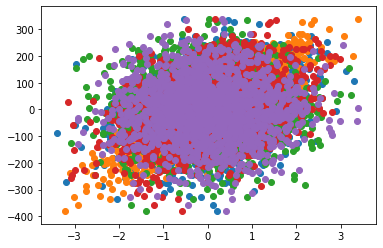

(5, 1600)
(1600,)


In [4]:
#plt.scatter(x1,y)
#plt.scatter(x2,y)
#plt.scatter(x3,y)
#plt.scatter(x4,y)
#plt.scatter(x5,y)
X1 = (x1-x1.mean())/x1.std()
X2 = (x2-x2.mean())/x2.std()
X3 = (x3-x3.mean())/x3.std()
X4 = (x4-x4.mean())/x4.std()
X5 = (x5-x5.mean())/x5.std()
Y=y
X=[]
X.append(X1)
X.append(X2)
X.append(X3)
X.append(X4)
X.append(X5)
Y = y
plt.scatter(X[0],Y)
plt.scatter(X[1],Y)
plt.scatter(X[2],Y)
plt.scatter(X[3],Y)
plt.scatter(X[4],Y)
plt.show()
print(np.shape(X))
print(np.shape(Y))

# Gradient Descent Algorithm
  -Start with a random theta.
  
  -Repeat until converge.
  
  -Update Theta according to the rule.

In [5]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3] + theta[5]*x[4]


def error(X,Y,theta):
    
    m = X[0].shape[0]
    error = 0
    
    for i in range(m):
        lst=[]
        lst.append(X[0][i])
        lst.append(X[1][i])
        lst.append(X[2][i])
        lst.append(X[3][i])
        lst.append(X[4][i])
        hx = hypothesis(lst,theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((6,))
    m = X[0].shape[0]
    for i in range(m):
        lst=[]
        lst.append(X[0][i])
        lst.append(X[1][i])
        lst.append(X[2][i])
        lst.append(X[3][i])
        lst.append(X[4][i])
        hx = hypothesis(lst,theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[0][i]
        grad[2] += (hx-Y[i])*X[1][i]
        grad[3] += (hx-Y[i])*X[2][i]
        grad[4] += (hx-Y[i])*X[3][i]
        grad[5] += (hx-Y[i])*X[4][i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.0005):
    
    theta = np.array([-2.0,0.0,1.0,-3.0,0.1,0.3])
    
    itr = 0
    max_itr = 500
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1],theta[2],theta[3],theta[4],theta[5]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta[2] = theta[2] - learning_rate*grad[2]
        theta[3] = theta[3] - learning_rate*grad[3]
        theta[4] = theta[4] - learning_rate*grad[4]
        theta[5] = theta[5] - learning_rate*grad[5]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list


In [6]:
final_theta, error_list,theta_list = gradientDescent(X,Y)


In [7]:
print(final_theta)

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


In [9]:
### Plot the line for testing data
dft=pd.read_csv(r'C:\Users\Bhabesh Boro\Desktop\AI mafia\Linear Regression\Test.csv')
xtest=[]
xt=dft['feature_1'].values
xtest.append(xt)
xt=dft['feature_2'].values
xtest.append(xt)
xt=dft['feature_3'].values
xtest.append(xt)
xt=dft['feature_4'].values
xtest.append(xt)
xt=dft['feature_5'].values
xtest.append(xt)
print(np.shape(xtest[0]))

(400,)


In [10]:
print(hypothesis(xtest,final_theta))

[ 112.15168366  115.87976761  -25.87626158  -47.63583973 -102.51798162
  -50.2893194   -81.3683598    20.93713793  172.90067195  170.88408456
 -111.39443612  -25.59613481   -8.87208051  120.36150946   35.09400747
   41.78966378 -199.41769455   17.73984091    8.5360946   133.07321033
   61.45777124  -68.39998714 -114.50737628  -12.54690841  -64.1804854
    7.52041889   23.7846786   104.7686305    19.45718991  -31.19280855
  107.80088039  -51.11361967  215.83283486  -20.0027722  -238.03992037
  152.5478055    -8.26495851    9.13276736 -318.7446708    73.47903221
  -88.08890616 -214.92225985 -248.10351287  132.65718304  -80.84249
  101.17564239   -9.18199391   14.91509474 -104.82054763  -33.08742048
    7.17980668 -184.25133971   60.85422477 -105.23084917 -112.70614897
 -163.49566851   59.10706516  105.97835498  -79.92267914   38.710591
   36.83621295  -56.62420213  162.703482     38.96675646   52.6561406
   19.57225082   78.32374929   -7.31912263   -8.26017257   -3.63354354
  -27.9825329